# Régression par KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['figure.figsize'] = (4, 3)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## prédiction d'un sinus

**création du sinus  bruité**

on crée un sinus avec $N$ points entre $0$ et $2\pi$ 

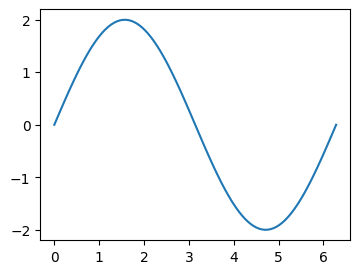

In [7]:
N = 100
X = np.linspace(0, 2*np.pi, N)
a = 2
y = a*np.sin(X) # on augmente l'amplitude de notre sinus¨
plt.plot(X, y);

on bruite notre sinus en modifiant un point sur $p$ avec une valeur aléatoirement générée d'une distribution uniforme entre $[0, 1[$  
(entre 0 et 1, donc le milieu est 0.5)

In [8]:
p = 5
middle = 0.5
noise = middle - np.random.rand(N//p)
# on veut des valeurs négatives aussi !

In [9]:
y[0:len(y):5].shape, noise.shape

((20,), (20,))

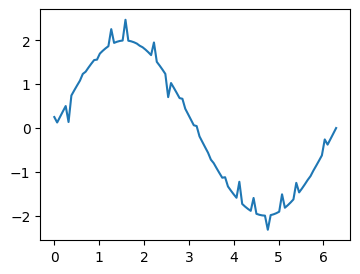

In [10]:
y[::p] = y[::p] + noise # remarquez le slicing
plt.plot(X, y);

on fait une dataframe

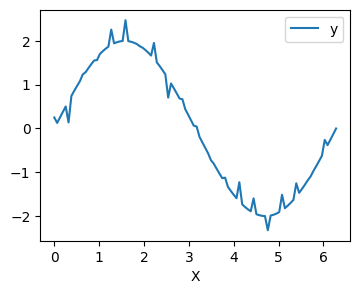

In [11]:
df_sinus = pd.DataFrame()
df_sinus['X'] = X
df_sinus['y'] = y
df_sinus.plot(x='X', y='y');
# df_sinus.plot()

**plages de valeurs**

pas besoin de faire de mise à l'échelle dans notre exemple, on n'a qu'une seule colonne...  

In [12]:
df_sinus['X'].min(), df_sinus['X'].max()

(0.0, 6.283185307179586)

In [13]:
df_sinus.describe()

,X,y
count,100.000000,100.000000
mean,3.141593,0.021084
std,1.841258,1.415107
min,0.000000,-2.322399
25%,1.570796,-1.297566
50%,3.141593,0.054467
75%,4.712389,1.391466
max,6.283185,2.471501


### entraînement d'un prédicteur par KNN-régression

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

`KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)`

In [15]:
# help(KNeighborsRegressor)

les paramètres de la méthode (ceux qui nous intéressent aujourd'hui)


- `n_neighbors` le $k$ (qui ici peut varier de $1$ à $100$)


- `weights` la pondération  
par défaut `'uniform'`  
peut-être `'distance'` (inverse de la distance)  
une une fonction à vous


- `algorithm` l'algorithme utilisé pour le calcul des $k$ plus proches voisins  
par défaut `'auto'` qui essaie de prendre le meilleur  
`'ball_tree'`, `'kd_tree'`, `'brute'` (brute-force search)

- `metric` la fonction de calcul de distance  
par défaut `'minkowski'` auquel on peut indiquer `p` (standard Euclidean distance quand p vaut 2)


- et d'autres paramètres, comme `p`, qui dépendent de nos autres choix de paramètres

In [16]:
n_neighbors = 8

# on construit un prédicteur de régression par KNN avec k = n_neighbors
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# un autre pour tester
knn_sinus = KNeighborsRegressor(n_neighbors=n_neighbors)

In [17]:
# on sépare entrées et sorties pour l'entraînement
X = df_sinus[['X']].to_numpy()
y = df_sinus['y'].to_numpy()

X.shape, y.shape

((100, 1), (100,))

In [94]:
# on entraîne le modèle sur un tableau numpy
knn_sinus.fit(X, y);

In [19]:
# on entraîne le modèle sur un tableau pandas
knn_model.fit(df_sinus[['X']], df_sinus['y']);

### prédiction des données d'entraînement

le modèle a été entraîné, on peut prédire des valeurs  
par exemple celles du jeu d'entraînement

In [20]:
# on prédit les données d'entraînement avec le prédicteur
y_fit = knn_model.predict(df_sinus[['X']])

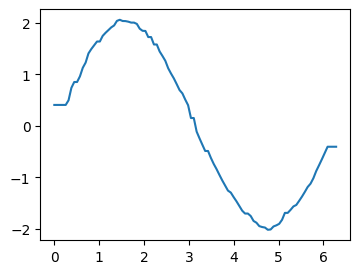

In [21]:
# on plot les données générées
plt.plot(df_sinus['X'], y_fit)

on obtient un sinus moins bruité

pourquoi y-a-t-il les zones horizontales en début et en fin de prédiction ?  
à cause de la non existence des plus proches voisins

### qualité du prédicteur - métriques

on calcule les erreurs

calculons la RMSE (root-mean-square-error) et la MSE (mean-square-error)

In [22]:
np.sqrt(np.sum(np.power(y_fit - df_sinus['y'], 2))/len(df_sinus))

0.1413085671280471

en fait on a des tas de métriques prédéfinies dans `metrics`  
utilisons `metrics.mean_squared_error`  
`squared` is True it is MSE value, RMSE if False

In [23]:
metrics.mean_squared_error(y_fit, df_sinus['y'], squared=False)

0.1413085671280471

In [24]:
np.sum(np.power(y_fit - df_sinus['y'], 2))/len(df_sinus)

0.01996811114378179

In [25]:
metrics.mean_squared_error(y_fit, df_sinus['y'], squared=True)

0.01996811114378179

### prédiction de données de tests

### sur tableau `numpy`

on génère de nouveaux points linéairement espacés entre $0$ et $2 \pi$

In [26]:
n = 500
pts = np.linspace(0, 2*np.pi, n)
pts.shape

(500,)

lors de l'entraînement, la forme de tableau était une matrice $(100, 1)$ i.e. $100$ lignes et $1$ colonne  
les prédictions se feront donc sur des tableaux de cette forme $(n, 1)$

In [27]:
df_sinus[['X']].shape, X.shape
# le premier est un tableau pandas le second un tableau numpy

((100, 1), (100, 1))

la forme du tableau généré n'est pas la bonne: on doit la modifier pour obtenuir les prédictions

In [28]:
pts.shape

(500,)

on lui donne la forme d'une matrice de $n$ observstions et $1$ colonne

In [29]:
pts = pts.reshape(-1, 1)
pts.shape

(500, 1)

In [30]:
type(pts)

numpy.ndarray

In [31]:
y_pred = knn_sinus.predict(pts)

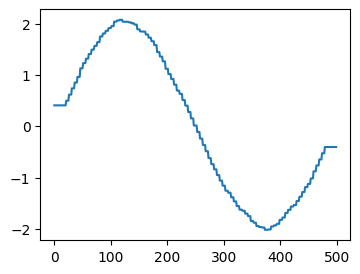

In [32]:
plt.plot(y_pred);

### sur tableau `pandas`

on génère de nouveaux points linéairement espacés entre $0$ et $2 \pi$

In [33]:
n = 100
df_pred = pd.DataFrame(np.linspace(0, 2*np.pi, n),
                      columns=['X'])
df_pred.head()

,X
0,0.000000
1,0.063467
2,0.126933
3,0.190400
4,0.253866


In [34]:
df_pred['y'] = knn_model.predict(df_pred[['X']])

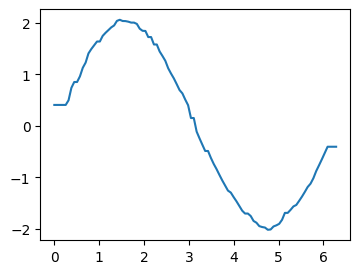

In [35]:
plt.plot(df_pred['X'], df_pred['y']);

pourquoi y-a-t-il les zones horizontales en début et en fin de prédiction ?  
à cause de la non existence des plus proches voisins

qualité du sinus ?  
qualité de la prédiction ?  
les données pour la prédiction ont-elles la même distibution que les données d'entraînement ? heu non

In [36]:
metrics.mean_squared_error(np.sin(df_pred['X']), df_pred['y'], squared=False)

0.6936718947259762

## mise à l'échelle des caractéristiques

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

on fait une dataframe avec 2 colonnes dont les plages de valeurs sont très différentes

,X1,X2
0,9.057675,725.963418
1,6.697668,724.362314
2,8.516181,724.755747
3,6.059874,722.066431
4,6.509275,725.450593


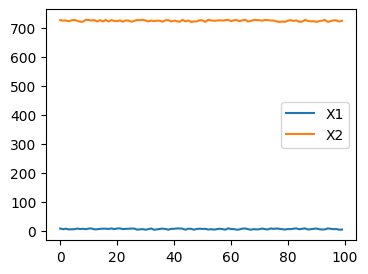

In [38]:
df = pd.DataFrame()
m1, s1 = 1, 4.8
m2, s2 = 100, 7.2
df['X1'] = (np.random.rand(100)+m1)*s1
df['X2'] = (np.random.rand(100)+m2)*s2
df.plot();
df.head()

on met à l'échelle par normalisation

In [39]:
tab = StandardScaler().fit(df).transform(df)

<AxesSubplot: >

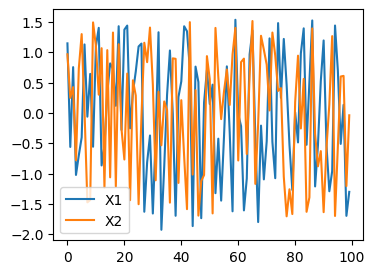

In [40]:
df_std_scaled = pd.DataFrame(tab, columns=df.columns)
df_std_scaled.plot()

on met à l'échelle par min-max

<AxesSubplot: >

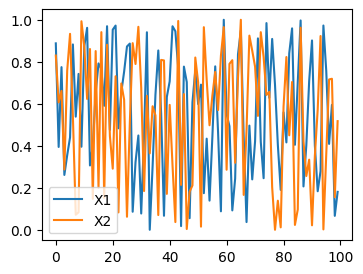

In [41]:
tab = MinMaxScaler().fit(df).transform(df)

df_min_max_scaled = pd.DataFrame(tab, columns=df.columns)
df_min_max_scaled.plot()

## jeu d'entraînement et jeu de test (validation)

découpons les observations dont nous disposons en
- un jeu de d'entraînement
- un  jeu de test

In [42]:
from sklearn.model_selection import train_test_split

In [47]:
df_iris = pd.read_csv('iris.csv')
df_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [55]:
X = df_iris.iloc[:, :-1]
y = df_iris['variety']

### à-la-main

peut être faux  
préférez les fonctions `sklearn`

In [49]:
t = 0.20
nb = len(X) - int(len(X)*t)
X_train, X_test = X[:nb], X[nb:]
y_train, y_test = y[:nb], y[nb:]

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

Que pensez-vous de ce split ?

In [58]:
y_train.value_counts()

Setosa        50
Versicolor    50
Virginica     20
Name: variety, dtype: int64

In [59]:
y_test.value_counts()

Virginica    30
Name: variety, dtype: int64

les données du `csv` sont ordonnées

### avec `train_test_split`

la méthode `train_test_split` prend des paramètres:  
`test_size` et `train_size`  
`random_state` (reproduction de shuffling)  
`shuffle`

In [60]:
X_train, X_test, y_train, y_test = \
   train_test_split(X, y, test_size=0.2, random_state=4)

In [61]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

## grid-search

nous voulons déterminer les meilleurs paramètres  
par exemple, dans le knn, on voudrait tester différentes cominaisons de  
`k`, de distance, de pondérations, d'algorithme...

### à-la-main pour `k`

In [62]:
errors = []
for k in range(1, 100):
    knn_model = KNeighborsRegressor(k)
    knn_model.fit(df_sinus[['X']], df_sinus['y'])
    y_fit = knn_model.predict(df_sinus[['X']])
    errors.append(metrics.mean_squared_error(y_fit,
                                             df_sinus['y'], squared=True))

on a gardé les erreurs, on peut les plotter

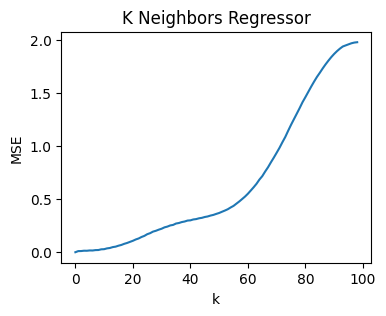

In [63]:
plt.plot(errors)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('K Neighbors Regressor');

comme il va falloir conserver les combinaisons et leur qualité  
autant utiliser des méthodes pré-définies comme le `GridSearchCV`

### avec `GridSearchCV`

In [64]:
from sklearn.model_selection import GridSearchCV

pour déterminer empiriquement des méta-parameters, on utilise le grid-search  
c'est une manière automatique de lancer l'apprentissage sur des combinaisons de valeurs des paramètres   
afin de déterminer la meilleure combinaison

on donne un dictionnaire
- avec comme clé les paramètres dont on veut tester les valeurs
- comme valeurs les valeurs choisiesà et les valeurs à utilise

créons un classifier  
affichons ses paramètres et leurs valeurs dans ce classifier

In [65]:
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [66]:
parameters = {'n_neighbors': [5, 10],
              'weights': ['uniform', 'distance'],
              'algorithm': ['kd_tree',  'brute'],
              'p': [1, 2],
             }

on définit un objet de grid-search avec
- le classifier à entraîner
- le dictionnaire des paramètres à essayer


et des paramètres comme  
`scoring` qui indique la stratégie d'évaluation de la performance du modèle  
(par défaut celle du classifier par exemple pour `KNeighborsClassifier.score`  
c'est la *mean accuracy*  *nb correct predictions divided by total number of predictions*)

`cv` par exemple un `5`  
le jeu de données va être divisé en 5 ensembles   
1 servira au test et les 4 autres à l'apprentissage  
(il le fera donc 5 fois)


pour utiliser `GridSearchCV`
- la méthode `fit` lance tous les apprentissage
- à la fin des apprentissages,  
l'attribut `best_params_` contient le dictionnaire de la combinaison de paramètres choisie  
l'attribut `cv_results_` indique des tas d'informations (à présenter en dataframe) 




In [67]:
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,
                   cv=5,
                   verbose=3,
                   return_train_score=True)
clf.fit(X,y);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END algorithm=kd_tree, n_neighbors=5, p=1, weights=uniform;, score=(train=0.958, test=0.967) total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=5, p=1, weights=uniform;, score=(train=0.967, test=0.967) total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=5, p=1, weights=uniform;, score=(train=0.967, test=0.900) total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=5, p=1, weights=uniform;, score=(train=0.975, test=0.967) total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=5, p=1, weights=uniform;, score=(train=0.958, test=1.000) total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=5, p=1, weights=distance;, score=(train=1.000, test=0.967) total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=5, p=1, weights=distance;, score=(train=1.000, test=0.967) total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=5, p=1, weights=distance;, score=(train=1.000,

In [68]:
clf.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

In [69]:
pd.DataFrame(clf.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004183,0.001160,0.006577,0.001198,kd_tree,5,1,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 5, 'p'...",0.966667,...,0.960000,0.032660,13,0.958333,0.966667,0.966667,0.975,0.958333,0.965000,0.006236
1,0.002197,0.000985,0.003788,0.001597,kd_tree,5,1,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 5, 'p'...",0.966667,...,0.960000,0.032660,13,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,0.000000
2,0.002792,0.001162,0.002991,0.000631,kd_tree,5,2,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 5, 'p'...",0.966667,...,0.973333,0.024944,5,0.966667,0.966667,0.975000,0.975,0.966667,0.970000,0.004082
3,0.002600,0.001739,0.003589,0.002722,kd_tree,5,2,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 5, 'p'...",0.966667,...,0.966667,0.036515,10,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,0.000000
4,0.003397,0.001201,0.004180,0.001599,kd_tree,10,1,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 10, 'p...",0.966667,...,0.973333,0.024944,5,0.958333,0.966667,0.975000,0.975,0.941667,0.963333,0.012472


In [70]:
df_results = pd.DataFrame(clf.cv_results_)
df_results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004183,0.001160,0.006577,0.001198,kd_tree,5,1,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 5, 'p'...",0.966667,...,0.96,0.03266,13,0.958333,0.966667,0.966667,0.975,0.958333,0.965,0.006236
1,0.002197,0.000985,0.003788,0.001597,kd_tree,5,1,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 5, 'p'...",0.966667,...,0.96,0.03266,13,1.000000,1.000000,1.000000,1.000,1.000000,1.000,0.000000


In [71]:
df_results.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.003175,0.001239,0.007391,0.004285,0.966667,0.991667,0.939583,0.960417,1.0,0.971667,0.027535,7.125000,0.982292,0.984896,0.986458,0.988542,0.978646,0.984167,0.003758
std,0.000959,0.000790,0.007850,0.011239,0.000000,0.014907,0.042546,0.013437,0.0,0.009584,0.007108,4.529533,0.018972,0.016164,0.014232,0.012124,0.022765,0.016622,0.004360
min,0.002192,0.000398,0.001793,0.000398,0.966667,0.966667,0.900000,0.933333,1.0,0.960000,0.016330,1.000000,0.958333,0.966667,0.966667,0.975000,0.941667,0.963333,0.000000
25%,0.002345,0.000720,0.003539,0.000738,0.966667,0.991667,0.900000,0.966667,1.0,0.965000,0.024944,4.750000,0.964583,0.966667,0.975000,0.975000,0.958333,0.968750,0.000000
50%,0.003091,0.001160,0.005302,0.001180,0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.025806,5.000000,0.987500,0.991667,0.987500,0.991667,0.983333,0.987500,0.002041
75%,0.003545,0.001588,0.008033,0.002489,0.966667,1.000000,0.975000,0.966667,1.0,0.975000,0.032660,10.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.006718
max,0.004988,0.003279,0.035304,0.046277,0.966667,1.000000,1.000000,0.966667,1.0,0.986667,0.036515,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.012472


<AxesSubplot: >

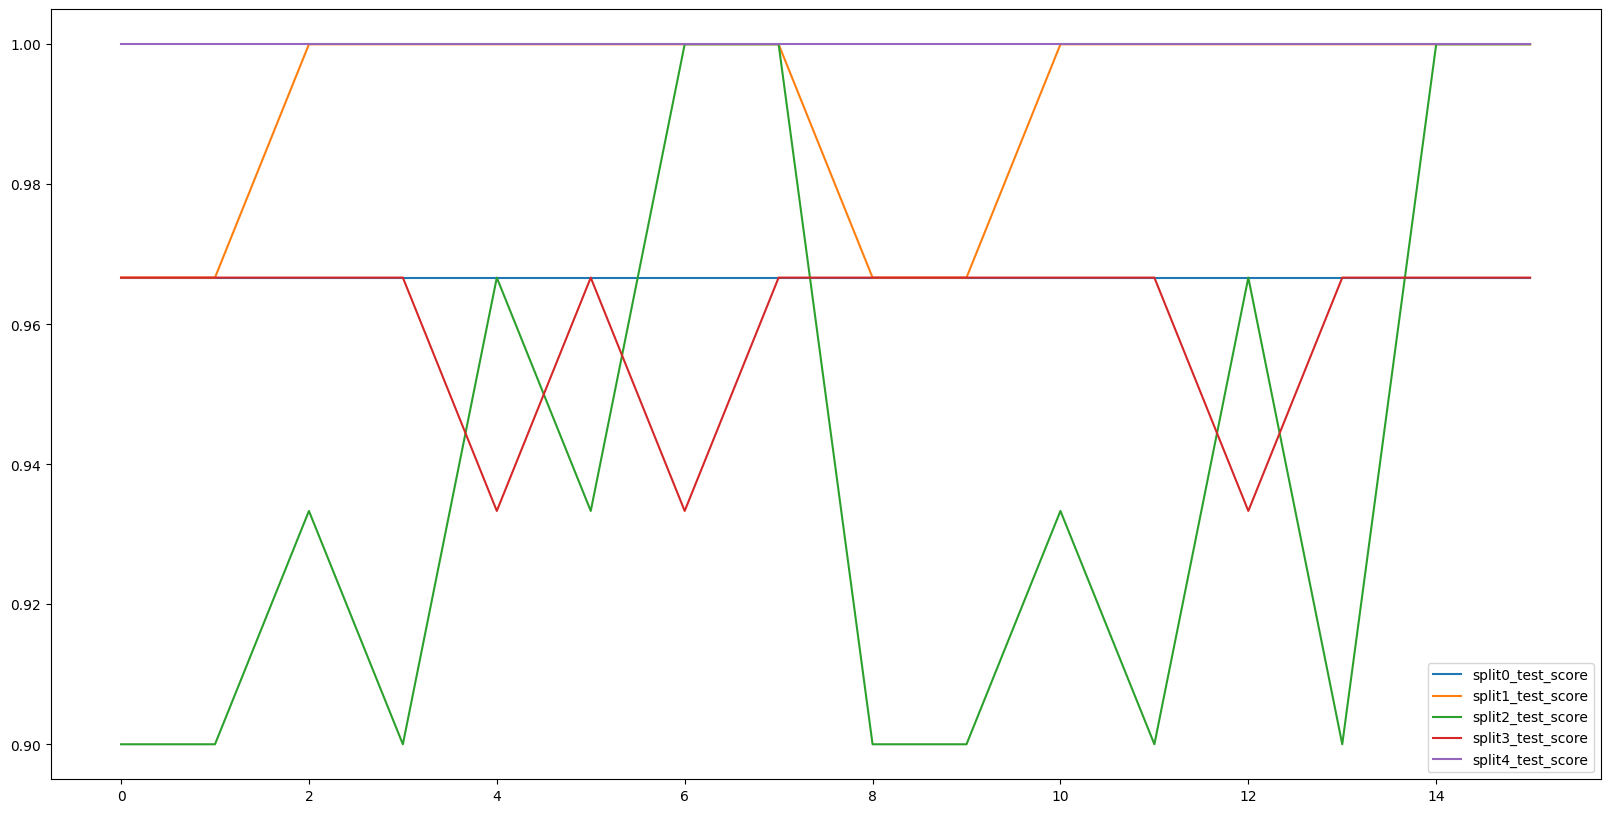

In [72]:
df_results[[c for c in df_results.columns if 'score' in c if 'split' in c if 'test' in c]].plot(figsize=(20, 10))

<AxesSubplot: >

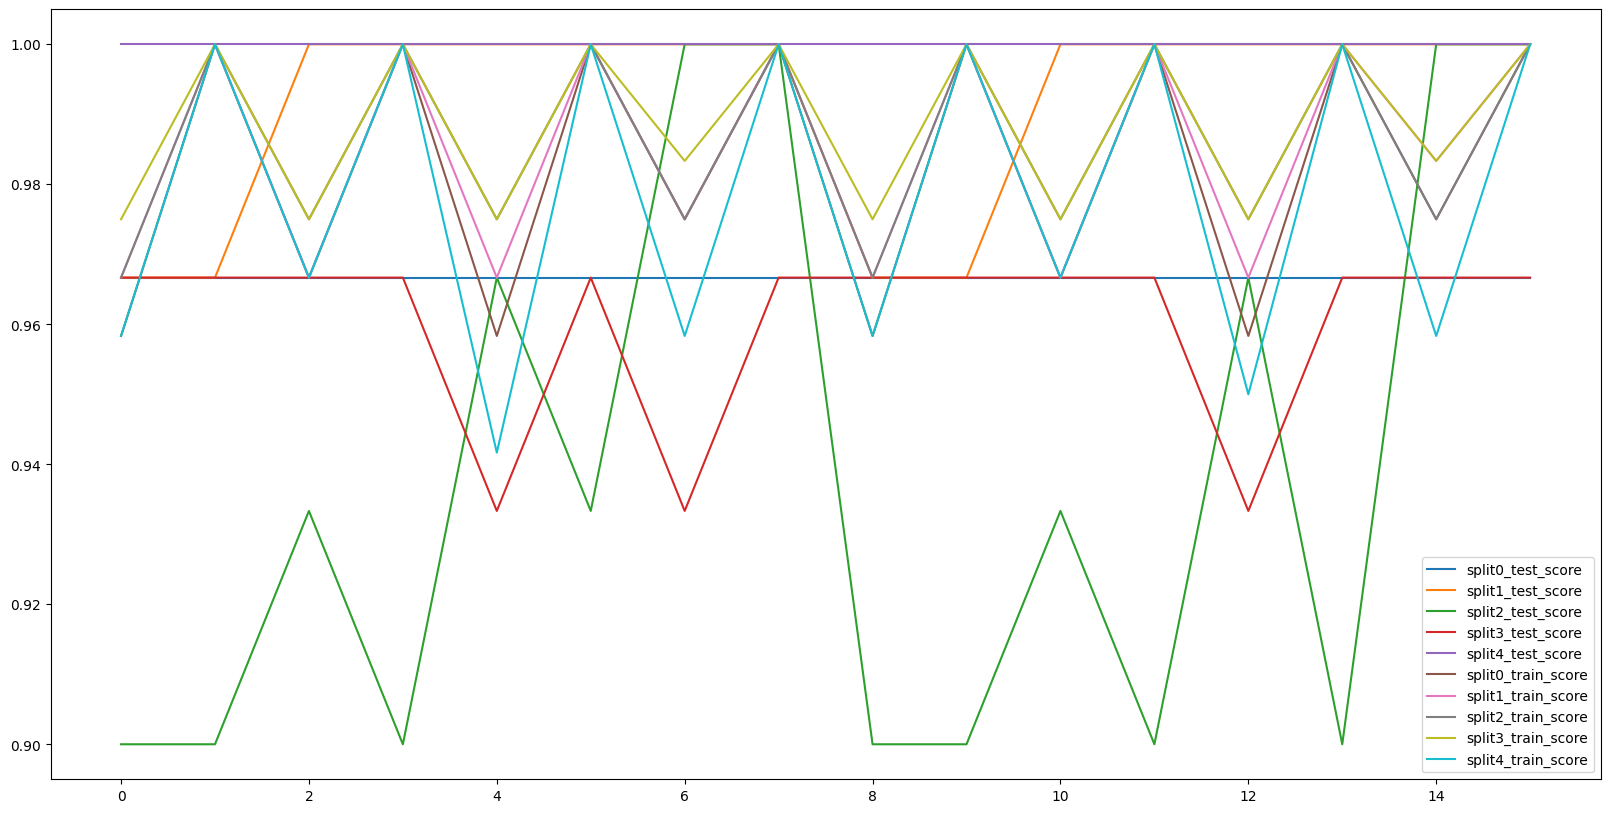

In [73]:
df_results[[c for c in df_results.columns if 'score' in c if 'split' in c]].plot(figsize=(20, 10))

In [74]:
clf.score(X, y)

1.0

## pipeline

quand les codes commencent à se complexifier    
utiliser `Pipeline`

In [75]:
from sklearn.pipeline import Pipeline

nous voulons faire:
une normalisation puis entraîner un prédicteur  
et ceci dans un grid-search

In [76]:
pipe = Pipeline([
        ('sc', StandardScaler()),     
        ('knn', KNeighborsClassifier()) 
    ])

# les noms des paramètres sont
#   préfixés par le nom de l'objet auquel ils se rapportent puis __
#   e.g.  knn__p
params = {
    'sc__with_mean' : [True, False],
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__p' : [1, 2],
    'knn__algorithm': ['kd_tree',  'brute'],
    
}  # 2 * 5 * 2 * 2 combinaisons

clf_pipe = GridSearchCV(estimator=pipe,           
                   param_grid=params, 
                   cv=5,
                   return_train_score=True, # Turn on cv train scores
                   verbose=1)
clf_pipe.fit(X, y)
clf_pipe.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'knn__algorithm': 'kd_tree',
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'sc__with_mean': True}

In [77]:
clf_pipe.score(X, y)

0.9533333333333334

erreur sur les classes

In [78]:
y_pred = clf_pipe.predict(X)

In [79]:
np.mean(y_pred == y)

0.9533333333333334

In [80]:
1 - np.mean(y_pred != y)

0.9533333333333334

## boxplot et histograms

In [81]:
df_results = pd.DataFrame(clf_pipe.cv_results_)
df_results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__algorithm,param_knn__n_neighbors,param_knn__p,param_sc__with_mean,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004813,0.001192,0.005192,0.002031,kd_tree,3,1,True,"{'knn__algorithm': 'kd_tree', 'knn__n_neighbor...",0.966667,...,0.953333,0.033993,17,0.958333,0.958333,0.966667,0.966667,0.95,0.96,0.006236
1,0.003990,0.001262,0.003390,0.000798,kd_tree,3,1,False,"{'knn__algorithm': 'kd_tree', 'knn__n_neighbor...",0.966667,...,0.953333,0.033993,17,0.958333,0.958333,0.966667,0.966667,0.95,0.96,0.006236


In [82]:
df_results.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.005505,0.001948,0.006011,0.001829,0.960000,0.970000,0.936667,0.900000,1.0,0.953333,0.036001,15.000000,0.950833,0.961667,0.963333,0.970000,0.955833,0.960333,0.008765
std,0.002027,0.001263,0.002742,0.001953,0.013503,0.010127,0.023631,0.021350,0.0,0.006039,0.006881,12.713812,0.011602,0.006752,0.006752,0.005598,0.005404,0.002701,0.003901
min,0.002993,0.000002,0.002591,0.000389,0.933333,0.966667,0.900000,0.866667,1.0,0.946667,0.024944,1.000000,0.933333,0.950000,0.950000,0.966667,0.950000,0.955000,0.003333
25%,0.003940,0.000920,0.003939,0.000745,0.966667,0.966667,0.933333,0.900000,1.0,0.946667,0.032660,1.000000,0.941667,0.958333,0.958333,0.966667,0.950000,0.958333,0.006236
50%,0.004586,0.001531,0.005212,0.001069,0.966667,0.966667,0.933333,0.900000,1.0,0.953333,0.033993,17.000000,0.958333,0.958333,0.966667,0.966667,0.958333,0.960000,0.008192
75%,0.007187,0.002573,0.007386,0.002060,0.966667,0.966667,0.966667,0.900000,1.0,0.960000,0.040000,25.000000,0.958333,0.966667,0.966667,0.975000,0.958333,0.961667,0.012472
max,0.011577,0.005048,0.013956,0.008783,0.966667,1.000000,0.966667,0.933333,1.0,0.960000,0.049889,37.000000,0.966667,0.975000,0.975000,0.983333,0.966667,0.965000,0.015456


<AxesSubplot: >

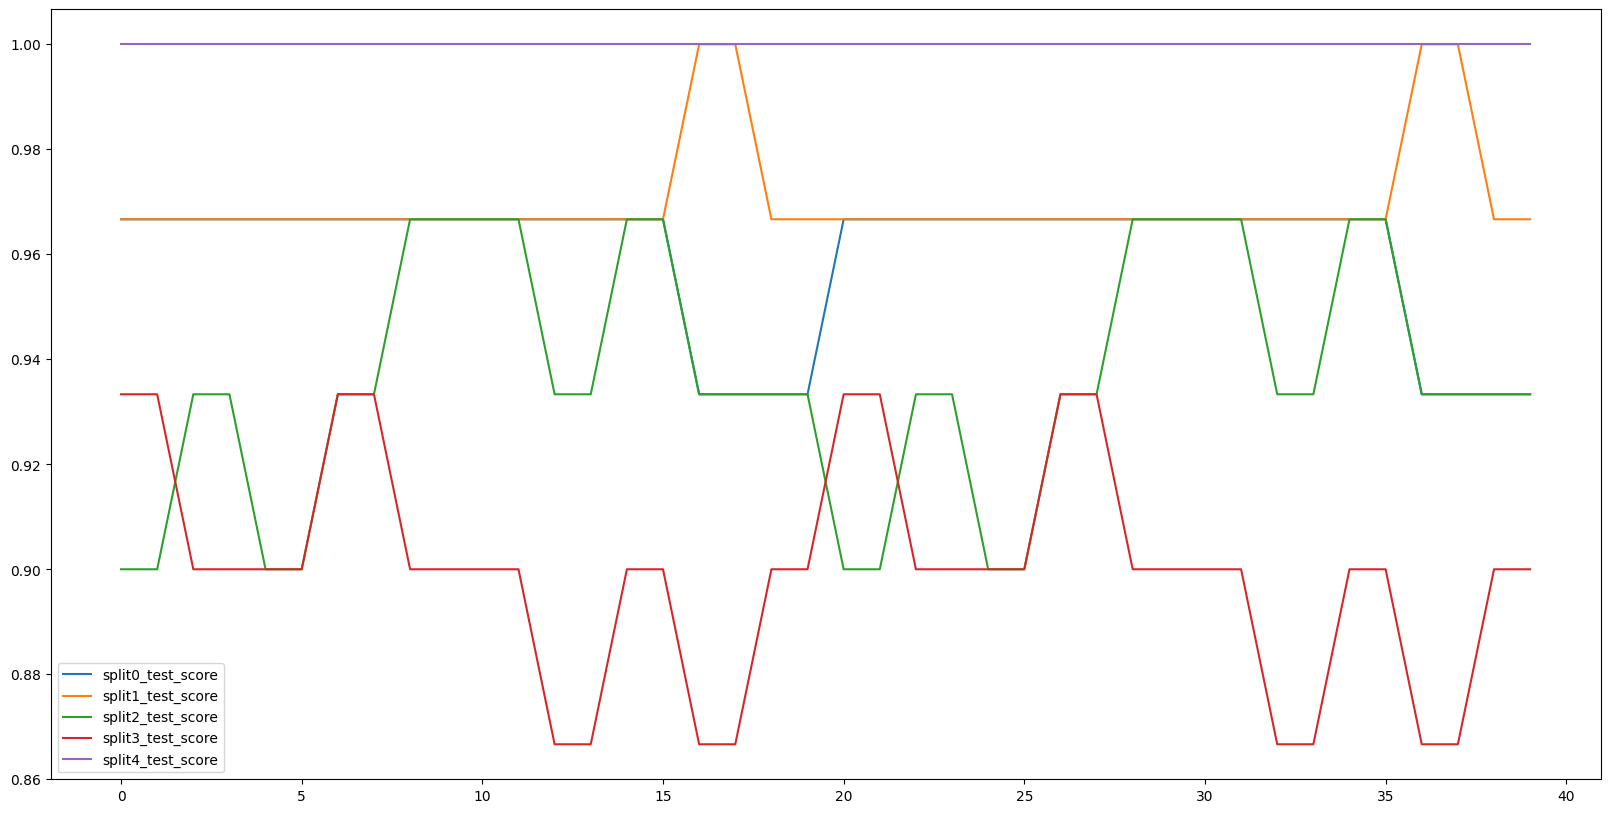

In [83]:
df_results[[c for c in df_results.columns if 'score' in c if 'split' in c if 'test' in c]].plot(figsize=(20, 10))

<AxesSubplot: >

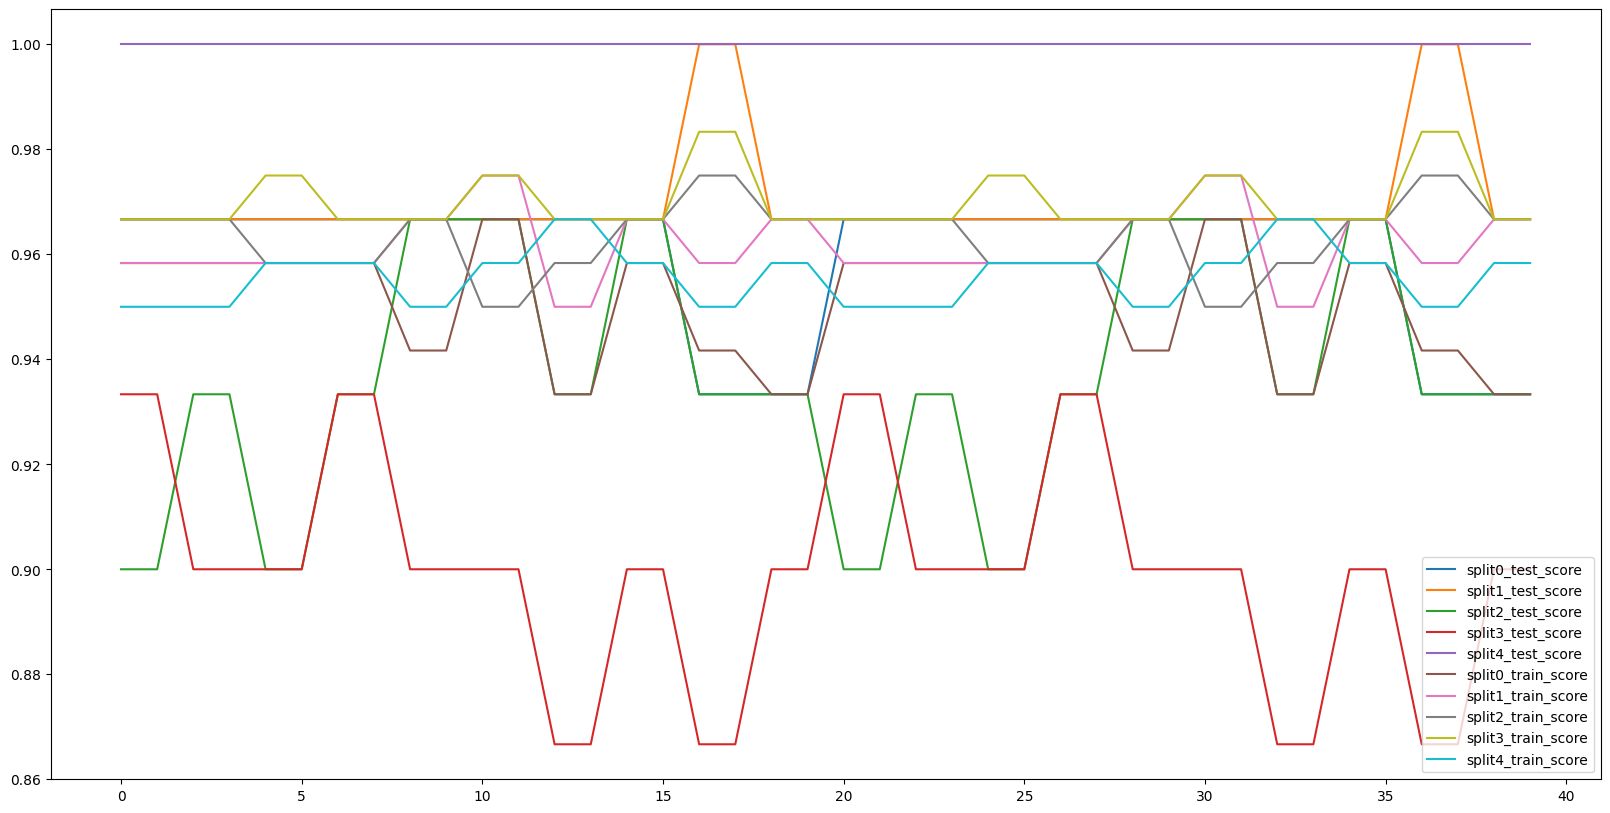

In [84]:
df_results[[c for c in df_results.columns if 'score' in c if 'split' in c]].plot(figsize=(20, 10))

In [85]:
df_iris = pd.read_csv('./iris.csv')
df_iris.head()

# on prend les valeurs numériques
X = df_iris[df_iris.columns[0:-1]]

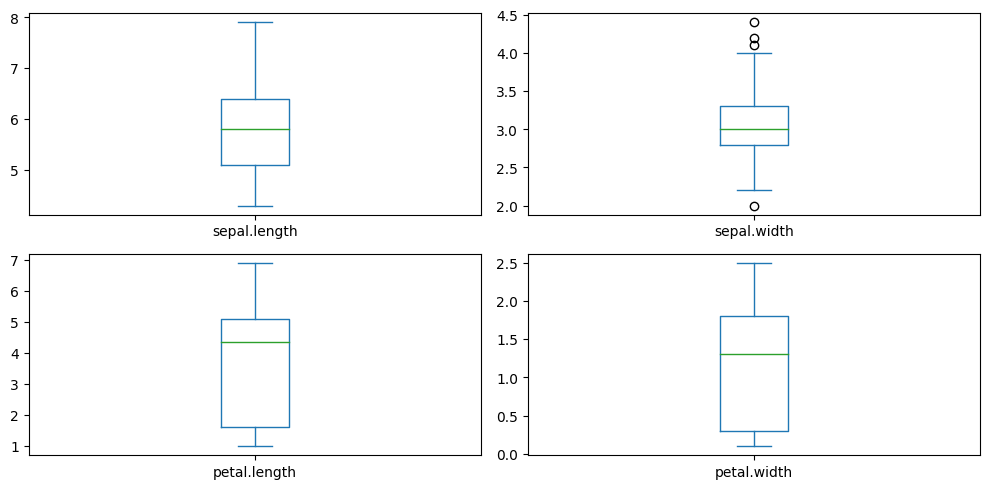

In [86]:
plt.rcParams['figure.figsize']=(10,5)
X.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout()

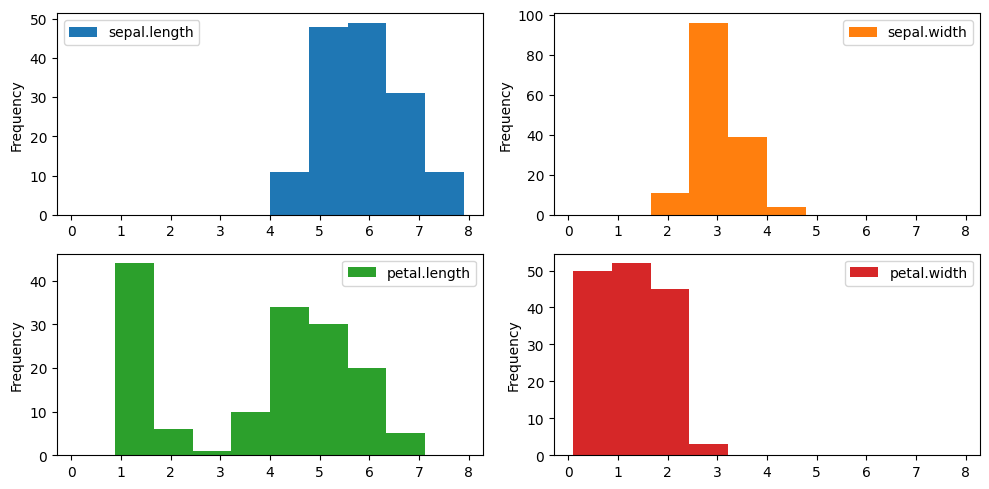

In [87]:
plt.rcParams['figure.figsize']=(10,5)
X.plot(kind='hist', bins=10, subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout()

## heatmap

<AxesSubplot: >

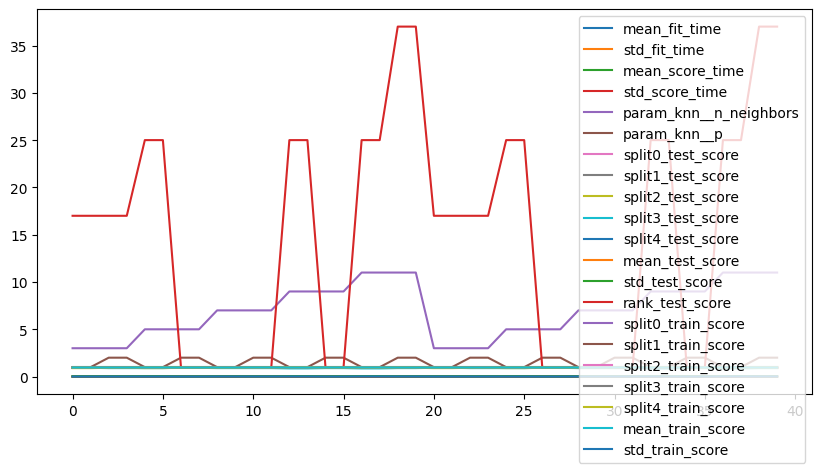

In [88]:
df_results.plot()

In [90]:
import seaborn as sns

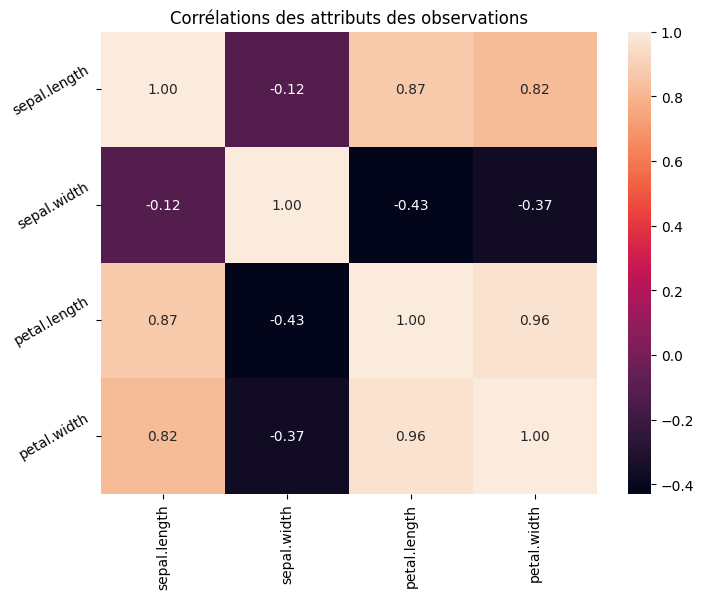

In [91]:
plt.figure(figsize=(8, 6))
plt.title('Corrélations des attributs des observations')
correlation = X.corr()
a = sns.heatmap(correlation, annot=True, fmt='.2f')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30);  

END